
Материалы курсов "Исследования скважин и пластов" и "Гидродинамические исследования скважин" в РГУ нефти и газа имени И.М.Губкина.

Версия 0.4 от 30.11.2024

Хабибуллин Ринат 2024 г.

---

# Формула Дюпюи и построение простых решений с python
Решение для задачи стационарного притока к вертикальной скважине в однородном изотропном пласте круговой формы с постоянным давлением на границе имеет вид

\begin{equation}
Q=\dfrac{kh}{18.41\mu B} \dfrac{P_{res}-P_{wf}}{\ln \dfrac{r_e}{r_w} + S}
\end{equation}

где 

* $Q$ - дебит скважины на поверхности, приведенный к нормальным условиям, ст. м$^3$/сут

* $\mu$ - вязкость нефти в пласте, сП

* $B$ - объемный коэффициент нефти, м$^3$/м$^3$

* $P_{res}$ - пластовое давление или давление на контуре с радиусом $r_e$, атма

* $P_{wf}$ - давление забойное, атма

* $k$ - проницаемость, мД

* $h$ - мощность пласта, м

* $r_e$ - внешний контур дренирования скважины, м

* $r_w$ - радиус скважины, м

* $S$ - скин-фактор скважины, м

Это решение известно как [закон Дарси](https://ru.wikipedia.org/wiki/%D0%97%D0%B0%D0%BA%D0%BE%D0%BD_%D0%94%D0%B0%D1%80%D1%81%D0%B8) или [формула Дюпюи](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%BE%D0%B4%D1%83%D0%BA%D1%82%D0%B8%D0%B2%D0%BD%D0%BE%D1%81%D1%82%D1%8C_(%D0%BD%D0%B5%D1%84%D1%82%D0%B5%D0%B4%D0%BE%D0%B1%D1%8B%D1%87%D0%B0)).

Выражение можно переписать в виде

\begin{equation}
P_{r} = P_{res} - 18.41\dfrac{ Q\mu B }{kh} \left[ \ln\dfrac{r_e}{r} +S \right]
\end{equation}

который удобен для расчета распределения давления в пласте $P_r$ на произвольном расстоянии от скважины $r$.
Здесь задано граничное значение давления $p_e$ на контуре $r_e$. Расчет позволит найти любое значение внутри контура, в том числе и забойное давление $P_{wf}$ на $r=r_w$

Также выражение можно переписать 
\begin{equation}
P_{r} = P_{wf} + 18.41\dfrac{ Q\mu B }{kh} \left[ \ln\dfrac{r}{r_w} +S \right]
\end{equation}

где по известному дебиту и забойному давлению можно найти давление в пласте. При известном пластовом давлении можно оценить радиус контура на котором оно достигается.

In [1]:
"""
Импортируем библиотеки для расчетов. 
numpy используем для работы с массивами  
и подготовки данных для построения графиков.
matplotlib используем для построения графиков
scipy для решения линейных уравнений
"""
import numpy as np
import matplotlib.pyplot as plt
import scipy

Для удобства дальнейшего изложения и использования расчетных функций при создании функций и переменных на языке python
названия формируются по следующим принципам:

* сначала указывается, что расчитывается в функции, в данном случае - давление $p$

* потом указываются пояснения - в данном случае p_ss - steady state pressure

* в конце указывается размерность в которой ожидается получаение ответа - в данном случае atma - абсолютные атмосферы.

In [2]:
"""
Определим функции для расчета стационарного решения
"""
def dp_ss_atm(q_liq_sm3day = 50,
               mu_cP = 1,
               b_m3m3 = 1.2,
               kh_mDm = 40,
               r_e_m = 240,
               r_m = 0.1):
  """
  функция расчета перепада давления в произвольной точке пласта 
  на расстоянии r_m от центра скважины для стационарного решения
 
  - q_liq_sm3day - дебит жидкости на поверхности в стандартных условиях
  - mu_cP - вязкость нефти (в пластовых условиях)
  - B_m3m3 - объемный коэффициент нефти 
  - kh_mDm - kh пласта
  - r_e_m - радиус контрура питания, м  
  - r_m - расстояние на котором проводится расчет, м
  """
  return 18.42 * q_liq_sm3day * mu_cP * b_m3m3/ kh_mDm * np.log(r_e_m/r_m)

def p_ss_atma(p_res_atma = 250,
              q_liq_sm3day = 50,
              mu_cP = 1,
              b_m3m3 = 1.2,
              k_mD = 40,
              h_m = 10,
              r_e_m = 240,
              r_m = 0.1):
  """
  функция расчета давления в произвольной точке пласта 
  на расстоянии r_m от центра скважины для стационарного решения 

  - p_res_atma - пластовое давление, давление на контуре питания
  - q_liq_sm3day - дебит жидкости на поверхности в стандартных условиях
  - mu_cP - вязкость нефти (в пластовых условиях)
  - B_m3m3 - объемный коэффициент нефти 
  - k_mD - проницаемость пласта
  - h_m - мощность пласта, м
  - r_e_m - радиус контрура питания, м  
  - r_m - расстояние на котором проводится расчет, м
  """
  return p_res_atma - dp_ss_atm(q_liq_sm3day = q_liq_sm3day,
                                mu_cP = mu_cP,
                                b_m3m3 = b_m3m3,
                                kh_mDm = k_mD * h_m,
                                r_e_m = r_e_m,
                                r_m = r_m)

## Построение графика с использованием `matplotlib` 

Самый простой пример построения графиков в python - использование библиотеки matplotlib.

Построим график распределения давления в пласте - воронку депресси ориентируясь на выражение (10.2).

Для формирования графика требуется создать два массива значений - x и y и отобразить их. Для формирования массива используются методы библиотеки numpy.

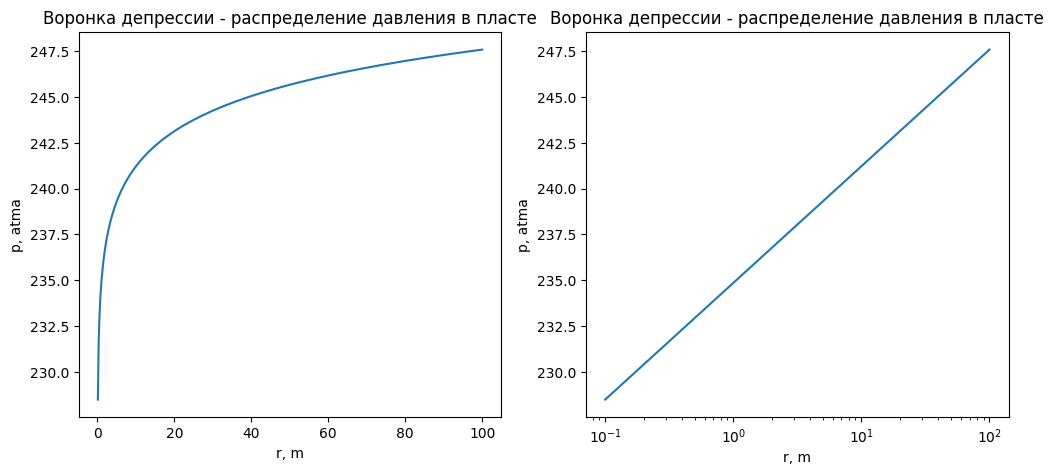

In [3]:
"""
Построим график распределения давления в пласте
"""
# формируем массив расстояний для которых будем проводить расчет
r_arr = np.linspace(0.1, 100, 500) 

# рассчитываем массив давлений на соответствующих расстояниях
# для расчета используется векторный расчет numpy - нет необходимости делать цикл в явном виде
# для примера показана передача всех аргументов созданной функции
p_arr = p_ss_atma(p_res_atma = 250,
                  q_liq_sm3day = 50,
                  mu_cP = 1,
                  b_m3m3 = 1.2,
                  k_mD = 40,
                  h_m = 10,
                  r_e_m = 240,
                  r_m = r_arr)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# рисуем график в обычных координатах
ax1.plot(r_arr, p_arr)   # команда отрисовки графика по заданным массивам
# настраиваем график
ax1.set_title('Воронка депрессии - распределение давления в пласте')
ax1.set_xlabel('r, m')
ax1.set_ylabel('p, atma')

# рисуем график в логарифмических координатах
ax2.plot(r_arr, p_arr)   # команда отрисовки графика по заданным массивам
# настраиваем график
ax2.set_title('Воронка депрессии - распределение давления в пласте')
ax2.set_xlabel('r, m')
ax2.set_ylabel('p, atma')
ax2.set_xscale('log')
plt.show()

График имеет вид логарифмической зависимости, на графике в полулогарифмических координатах он будет выглядеть как прямая линия.

## Построение карты давлений с использованием `matplotlib` 
Построим карту пластовых давлений с использованием формулы Дюпюи. 

Для построения карты полезно вспомнить, что расстояние от скважины с координатами $(x_{well}, y_{well})$ до произвольной точки пласта с координатами $(x,y)$ можно найти по формуле 
$$
r=\sqrt{ (x-x_{well})^2 + (y-y_{well})^2 }
$$

простой вариант расчета  - можно создать пустую матрицу со значениями давления по сетке и перебирая все точки на сетке/матрице рассчитать давления

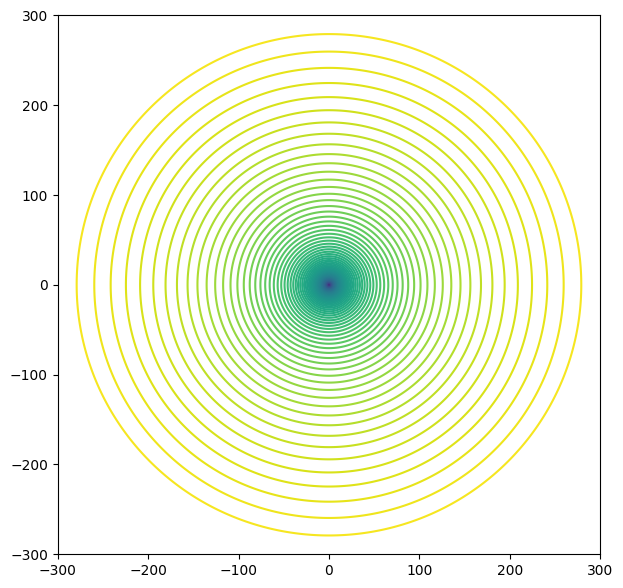

In [4]:
"""
Построим карту или сетку распределения давления в пласте
"""
# зададим параметры воронки депрессии
pres = 250 
r_e = 300

# зададим координаты скважины
xwell1 = 0
ywell1 = 0

# зададим координатную сетку основываясь на параметрах
x = np.linspace(-r_e, r_e, 500)
y = np.linspace(-r_e, r_e, 500)

# создадим пустую матрицу значений
p_grid = np.zeros((500,500))

# перебираем в цикле все элементы матрицы и рассчитываем давления
for i in range(len(x)):          # пример 1 как получить индексы из списка
    for j,val in enumerate(y):   # пример 2 как получить индексы из списка
        # рассчитываем давления подставляя расстояния
        p_grid[i,j] = p_ss_atma(p_res_atma = 250,
                        q_liq_sm3day = 50,
                        mu_cP = 1,
                        b_m3m3 = 1.2,
                        k_mD = 40,
                        h_m = 10,
                        r_e_m = r_e,
                        r_m = ((x[i]-xwell1)**2 + (y[j]-ywell1)**2)**0.5
                        )
# Удалим из сетки все элементы где давление больше пластового
p_grid = np.where(p_grid>250,250,p_grid)

# построим отображение в виде контурной карты
plt.rcParams["figure.figsize"] = (7,7)
plt.contour(x, y, p_grid, levels=100)
plt.show()

Для ускорения и оптимизации расчета можно для расчета матрицы давлений использовать векторные возможности пакета numpy.
Для построения карты необходимо рассчитать значения давления на регулярной сетке, что можно сделать с использованием функции `np.meshgrid`

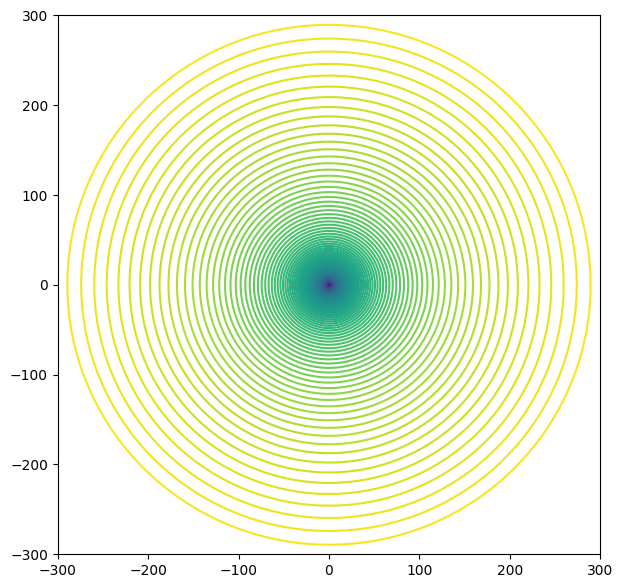

In [5]:
"""
Построим карту или сетку распределения давления в пласте
с использованием векторных функций numpy
"""
# зададим параметры воронки депрессии
pres = 250 
r_e = 300

# зададим координатную сетку основываясь на параметрах
x = np.linspace(-r_e, r_e, 300)
y = np.linspace(-r_e, r_e, 300)
# рассчитаем вспомогательные вектора для построения сетки
xv, yv = np.meshgrid(x, y)
# зададим координаты скважины
xwell1 = 0
ywell1 = 0
# рассчитаем значение давлений во всех точках сетки
# расчет ведется для матрицы координата с использованием векторных возможностей numpy
p_mesh = p_ss_atma(r_m=((xv-xwell1)**2 + (yv-ywell1)**2)**0.5, p_res_atma=pres, r_e_m=r_e)
# удалим значения за контуром, так как в данном случае они не имеют смысла
p_mesh[np.where(p_mesh > pres)] = pres
# построим отображение в виде контурной карты
plt.rcParams["figure.figsize"] = (7,7)
plt.contour(x, y, p_mesh, levels=100)
plt.show()

## Cуперпозиция для нескольких скважин с постоянным дебитом
Для стационарного решения работает принцип суперпозиции - сумма двух решений также будет решением, это позволяет построить карту для нескольких скважин.
Давление в любой точке пласта можно найти по формуле

\begin{equation}
P_{res} - P_{x,y} =  \sum_{i} 18.41\dfrac{ Q_i\mu B }{kh} \left[ \ln\dfrac{r_e}{\sqrt{ (x-x_{w.i})^2 + (y-y_{w.i})^2 }} +S \right]
\end{equation}

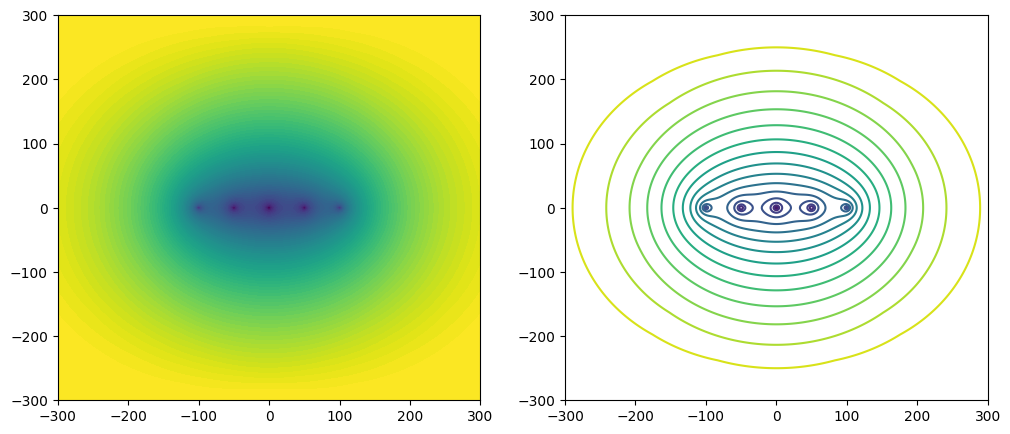

In [6]:
"""
Построим карту или сетку распределения давления в пласте
для ряда/галереи скважин
"""
# зададим параметры воронки депрессии
pres = 250 
r_e = 300

# зададим координаты скважины (всего будет 5 скважин у которых меняется только х координата)
xwell = [-100, -50, 0 , 50, 100]
ywell = 0

# зададим координатную сетку основываясь на параметрах
x = np.linspace(-r_e, r_e, 300)
y = np.linspace(-r_e, r_e, 300)
# рассчитаем вспомогательные вектора для построения сетки
xv, yv = np.meshgrid(x, y)

# зададим пустой список матриц с перепадами давлений от каждой отдельной скважины
p_mesh_i=[]

# для каждой скважины найдем ее влияние на давления
for xi in xwell:
    # рассчитаем матрицу расстояний от элементов сетки до скважины i
    r_well = ((xv-xi)**2 + (yv-ywell)**2)**0.5
    # рассчитаем значение давлений во всех точках сетки для скважины i
    p_mesh_i_ = p_ss_atma(r_m=r_well, p_res_atma=pres, r_e_m=r_e)
    # удалим значения за контуром, так как в данном случае они не имеют смысла
    p_mesh_i_[np.where(p_mesh_i_ > pres)] = pres
    # сохраним влияние скважины i в списке матриц влияния отдельных скважин
    p_mesh_i.append(p_mesh_i_)
    
# найдем суммарное влияние все скважин
p_mesh_sum = 0
for p_mesh_i_ in p_mesh_i:
    # найдем сумму решений, помним что суммировать можно депрессии
    p_mesh_sum = pres - p_mesh_i_ + p_mesh_sum
p_mesh_sum = pres -  p_mesh_sum

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
# построим отображение в виде контурной карты
ax1.contourf(x, y, p_mesh_sum, levels=100)
# построим отображение в виде контурной карты
ax2.contour(x, y, p_mesh_sum, levels=15)
plt.show()

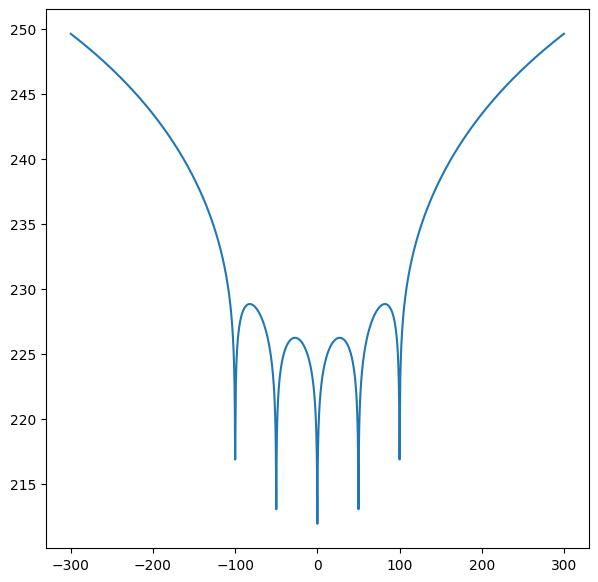

In [7]:
"""
Построим график изменения давления по линии расположения скважин
"""
xline = np.linspace(-300, 300, 10000)
yline = 0

pline = np.zeros_like(xline)
for xi in xwell:
    r_well = ((xline-xi)**2 + (yline-ywell)**2)**0.5
    r_well = np.where(r_well < 0.1, 0.1, r_well)
    pline = pline + p_ss_atma(r_m=r_well, 
                              p_res_atma=0, 
                              r_e_m=r_e, 
                              q_liq_sm3day = 50,
                              mu_cP = 1,
                              b_m3m3 = 1.2,
                              k_mD = 40,
                              h_m = 10)
pline = pres + pline

plt.plot(xline, pline)
plt.show()

## Суперпозиция для нескольких скважин с постоянным забойным давлением 

При наличии нескольких скважин можно записать выражение для оценки забойных давлений скважин


$$P_{res} - P_{wf.j} =  \sum_{i} 18.41\dfrac{ Q_i\mu B }{kh} \left[ \ln\dfrac{r_e}{\sqrt{ (x_{w.j}-x_{w.i})^2 + (y_{w.j}-y_{w.i})^2 }} +S \right]
$$

Если считать забойные давления $P_{wf.j}$ известными а дебиты скважин $Q_i$ не известными, тогда выражение (6) можно рассматривать как систему линейных алгебраических уравнений вида

$$AX = B $$

Где
$$A_{[i,j]} = 18.41\dfrac{ \mu B }{kh} \left[ \ln\dfrac{r_e}{\sqrt{ (x_{w.j}-x_{w.i})^2 + (y_{w.j}-y_{w.i})^2 }} +S \right]$$

$$B_{[j]}=P_{res} - P_{wf.j} $$

такую систему можно решить например с использованием пакета `scipy.linalg` 

[263.52443121 214.68400868 202.93807722 214.68400868 263.52443121]


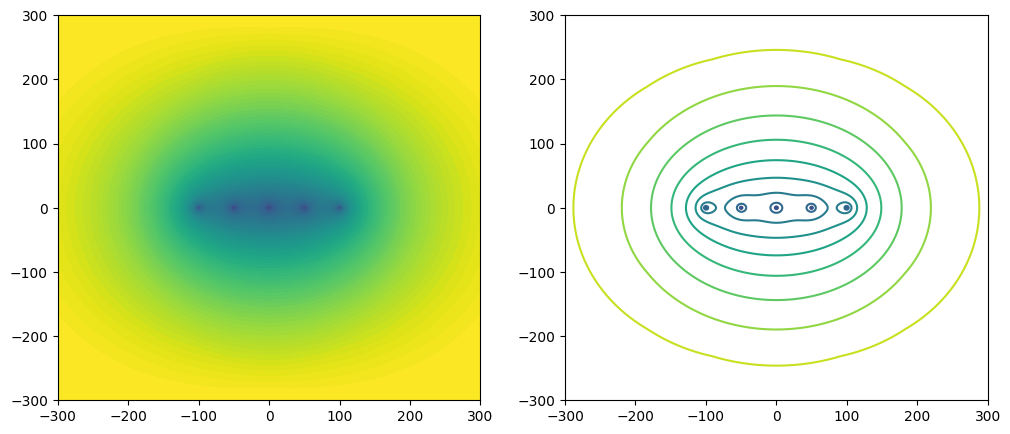

In [8]:
# зададим параметры воронки депрессии
pres = 250 
r_e = 300

# зададим координатную сетку основываясь на параметрах
x = np.linspace(-r_e, r_e, 500)
y = np.linspace(-r_e, r_e, 500)
# рассчитаем вспомогательные вектора для построения сетки
xv, yv = np.meshgrid(x, y)

# зададим координаты скважины (всего будет 5 скважин у которых меняется только х координата)
xwell = [-100, -50, 0 , 50, 100]
ywell = [0,0,0,0,0]
pwell = [100, 100, 100, 100, 100]   # забойные давления скважин
qwell = [0,0,0,0,0]  # дебиты скважин, должны быть найдены

# создадим заготовки матрицы А и вектора В по формулам (4) и (5)
A = np.zeros((5,5))
B = np.zeros(5)
# сформируем матрицу А
for i,v in enumerate(xwell):
    for j,v in enumerate(ywell):
        # найдем расстояния от одной скважины до другой
        # ищем расстояния между центрами скважин
        r_ij = ((xwell[i]-xwell[j])**2 + (ywell[i]-ywell[j])**2)**0.5
        # если расстояние 0 значит ищем влияние скважины саму на себя
        # тогда подставляем радиус скважины
        if r_ij == 0:
            r_ij = 0.1
        # чтобы воспользоваться ранее заданной формулой в виде функции
        # вызовем ее с нулем пластовым давлением и единичным дебитом
        A[i,j] = - p_ss_atma(p_res_atma = 0,
                              q_liq_sm3day = 1,
                              mu_cP = 1,
                              b_m3m3 = 1.2,
                              k_mD = 40,
                              h_m = 10,
                              r_e_m = 240,
                              r_m = r_ij)
    B[i] = pres - pwell[i]
# найдем решение = значения дебитов при которых забойные равны заданным значениям
qwell = scipy.linalg.solve(A,B)

# напечатаем найденные дебиты
print(qwell)

# зададим пустой список матриц с перепадами давлений от каждой отдельной скважины
p_mesh_i=[]

# для каждой скважины найдем ее влияние на давления
for i,xi in enumerate(xwell):
    # рассчитаем матрицу расстояний от элементов сетки до скважины i
    r_well = ((xv-xwell[i])**2 + (yv-ywell[i])**2)**0.5
    # для красоты отрисовки карты давлений пренебрежем значениями в радиусе одного метра от скважин
    r_well[r_well<1]=0.1
    # рассчитаем значение давлений во всех точках сетки для скважины i
    p_mesh_i_ = p_ss_atma(r_m=r_well, p_res_atma=pres, r_e_m=r_e, q_liq_sm3day=qwell[i])
    # удалим значения за контуром, так как в данном случае они не имеют смысла
    p_mesh_i_[np.where(p_mesh_i_ > pres)] = pres
    # сохраним влияние скважины i в списке матриц влияния отдельных скважин
    p_mesh_i.append(p_mesh_i_)
    
# найдем суммарное влияние все скважин
p_mesh_sum_new = 0
for p_mesh_i_ in p_mesh_i:
    # найдем сумму решений, помним что суммировать можно депрессии
    p_mesh_sum_new = pres - p_mesh_i_ + p_mesh_sum_new
p_mesh_sum_new = pres -  p_mesh_sum_new

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
# построим отображение в виде контурной карты
ax1.contourf(x, y, p_mesh_sum_new, levels=100)
# построим отображение в виде контурной карты
ax2.contour(x, y, p_mesh_sum_new, levels=15)
plt.show()

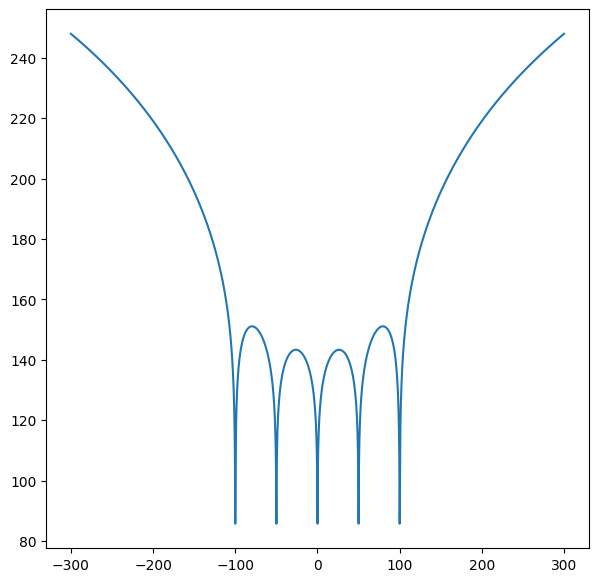

In [9]:
"""
Построим график изменения давления по линии расположения скважин
"""
xline = np.linspace(-300, 300, 10000)
yline = 0

pline = np.zeros_like(xline)
for i,xi in enumerate(xwell):
    r_well = ((xline-xi)**2 + (yline-ywell[i])**2)**0.5
    r_well = np.where(r_well < 0.1, 0.1, r_well)
    pline = pline + p_ss_atma(r_m=r_well, 
                              p_res_atma=0, 
                              r_e_m=r_e, 
                              q_liq_sm3day=qwell[i],
                              mu_cP = 1,
                              b_m3m3 = 1.2,
                              k_mD = 40,
                              h_m = 10)
pline = pres + pline

plt.plot(xline, pline)
plt.show()

## Расчета поля давлений для нескольких скважин на стационарном режиме с использованием классов

Классы в python помогают задавать сложные структуры данных (инкапсуляция) и работать с ними как с едиными объектами. Скважины с их параметрами, а также группы скважин могут быть заданы с использованием классов.

Класс для расчета влияния одной скважины
- объединяет все необходимые данные для скважины
- позволяет рассчитать депрессию и давления в любой точке пласта с учетом радиуса влияния и радиуса скважины

In [ ]:
class Well:
    """
    класс Well описывает влияние одной скважины на поле давления
    используется стационарное решение
    """
    def __init__(self, name, xw_m, yw_m) -> None:
        self.x_m = xw_m
        self.y_m = yw_m
        self.name = name
        self.kh_mDm = 10.0
        self.b_m3m3 = 1.0
        self.mu_cP = 1.0
        self.skin = 0
        self.r_e_m = 250.0
        self.r_w_m = 0.1
        self.q_liq_sm3day = 10       
        
    def calc_dp_ss_atm(self, x_m, y_m):
        """
        расчет перепада давления в произвольной точке пласта 
        с заданными координатами
        для стационарного решения уравнения фильтрации 
        x_m, y_m координаты в которых рассчитывается давление
        """
        r_m = np.sqrt( (self.x_m - x_m)**2 + (self.y_m - y_m)**2 )
        r_m = np.where(r_m >= self.r_e_m, self.r_e_m ,r_m)
        r_m = np.where(r_m < self.r_w_m, self.r_w_m ,r_m)
        return dp_ss_atm(q_liq_sm3day=self.q_liq_sm3day,
                          mu_cP=self.mu_cP,
                          b_m3m3=self.b_m3m3,
                          kh_mDm=self.kh_mDm,
                          r_e_m=self.r_e_m,
                          r_m=r_m)
    
    def calc_dp_ss_well_atm(self, w):
        return self.calc_dp_ss_atm(w.x_m, w.y_m)

    def calc_p_ss_atma(self, x_m, y_m, p_res_atma):
        """
        функция расчета давления в произвольной точке пласта 
        с заданными координатами
        для стационарного решения уравнения фильтрации 
        x_m, y_m координаты в которых рассчитывается давление
        """
        return p_res_atma - self.calc_dp_ss_atm(x_m, y_m)
    
class Wells:
    """
    класс для группы взамодействующих скважин
    """
    def __init__(self, name:list, xw_m:list, yw_m:list, 
                 kh_mDm=10, b_m3m3=1, 
                 mu_cP=1, r_e_m =250, r_w_m=0.1) -> None:
        
        self.well_dict: dict[str, Well] = {} 
        for (n, x, y) in zip(name, xw_m, yw_m):
            self.well_dict.update({n: Well(n,x,y)})
        self.set_kh_mDm(kh_mDm)
        self.set_pvt(b_m3m3=b_m3m3, mu_cP=mu_cP)
        self.set_r_e_m(r_e_m)
        self.set_r_w_m(r_w_m)
        self.p_res_atma = 250
    
    def set_qliq_sm3day(self, q_liq_list_sm3day:list):
        for (wname, q) in zip(self.well_dict, q_liq_list_sm3day):
            self.well_dict[wname].q_liq_sm3day = q
    
    def set_kh_mDm(self, kh_mDm):
        for wn in self.well_dict:
            self.well_dict[wn].kh_mDm = kh_mDm

    def set_r_e_m(self, r_e_m):
        for wn in self.well_dict:
            self.well_dict[wn].r_e_m = r_e_m
    
    def set_r_w_m(self, r_w_m):
        for wn in self.well_dict:
            self.well_dict[wn].r_w_m = r_w_m

    def set_pvt(self, mu_cP, b_m3m3):
        for wn in self.well_dict:
            self.well_dict[wn].b_m3m3 = b_m3m3
            self.well_dict[wn].u_cP = mu_cP

    def calc_p_ss_atma(self, x_m, y_m):
        dp = 0
        for wn in self.well_dict:
            dp = dp + self.well_dict[wn].calc_dp_ss_atm(x_m, y_m)
        return self.p_res_atma - dp

    def estimate_qliq_from_pwf(self, wn_list:list, pwf_list:list):
        dim = len(wn_list)  # размерность матрицы для расчета дебитов

        # создадим заготовки матрицы А и вектора В по формулам (4) и (5)
        A = np.zeros((dim,dim))
        B = np.zeros(dim)

        for i, wni in enumerate(wn_list):
            self.well_dict[wni].q_liq_sm3day = 1
            for j, wnj in enumerate(wn_list):
                A[i,j] = self.well_dict[wni].calc_dp_ss_well_atm(self.well_dict[wnj])
            B[i] = self.p_res_atma - pwf_list[i]
        
        q_list = scipy.linalg.solve(A,B)

        for i, wni in enumerate(wn_list):
            self.well_dict[wni].q_liq_sm3day = q_list[i]



In [11]:
xlist = [300, -300, 50]
ylist = [0, 0, 200]
names = ['1', '2', '3']
qlist = [1, -20, 10]

ww = Wells(names, xlist, ylist, r_e_m=500)
ww.set_qliq_sm3day(qlist)


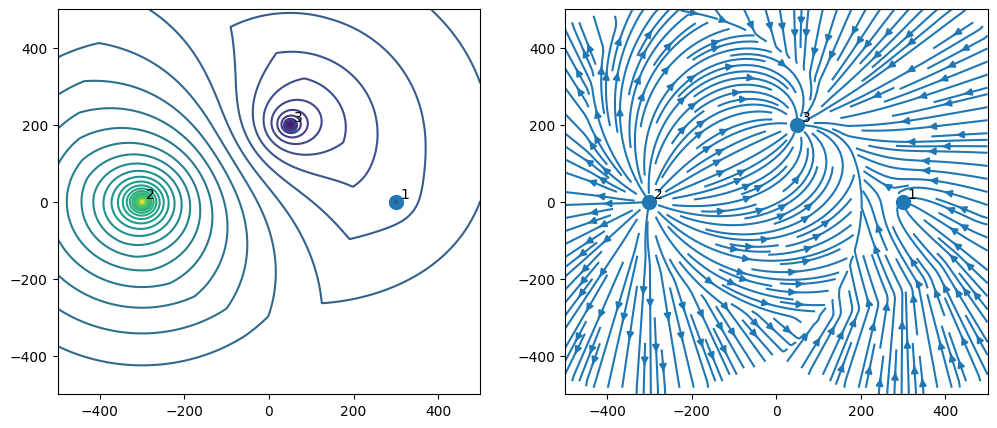

In [12]:
xp = np.linspace(-500, 500, 500)
yp = np.linspace(-500, 500, 500)

xv, yv = np.meshgrid(xp, yp)

p_mesh = ww.calc_p_ss_atma(xv, yv)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
# построим отображение в виде контурной карты
ax1.contour(xp, yp, p_mesh, levels=50)
for x,y,n in zip(xlist, ylist, names):
    ax1.text(x+10, y+10, n)
ax1.scatter(xlist, ylist, s =100)


ax2.streamplot(xp, yp, -np.gradient(p_mesh,axis=1), 
                       -np.gradient(p_mesh,axis=0), 
               density=2)
for x,y,n in zip(xlist, ylist, names):
    ax2.text(x+10, y+10, n)
ax2.scatter(xlist, ylist, s =100)
plt.show()

## Расчета поля давлений для нескольких скважин на стационарном режиме для заданных забойных давлений

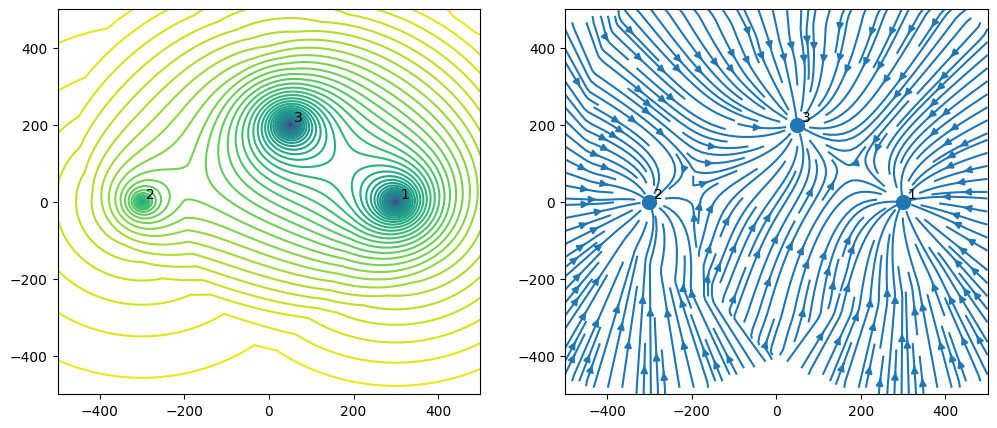

In [13]:
xlist = [300, -300, 50]
ylist = [0, 0, 200]
names = ['1', '2', '3']
qlist = [10, -20, 10]
plist = [50, 150, 50]

ww = Wells(names, xlist, ylist, r_e_m=500)
ww.estimate_qliq_from_pwf(names, plist)

xp = np.linspace(-500, 500, 500)
yp = np.linspace(-500, 500, 500)

xv, yv = np.meshgrid(xp, yp)

p_mesh = ww.calc_p_ss_atma(xv, yv)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
# построим отображение в виде контурной карты
ax1.contour(xp, yp, p_mesh, levels=50)
for x,y,n in zip(xlist, ylist, names):
    ax1.text(x+10, y+10, n)
ax1.scatter(xlist, ylist, s =100)

ax2.streamplot(xp, yp, -np.gradient(p_mesh,axis=1), 
                       -np.gradient(p_mesh,axis=0), 
               density=2)
for x,y,n in zip(xlist, ylist, names):
    ax2.text(x+10, y+10, n)
ax2.scatter(xlist, ylist, s =100)
plt.show()

# Задания для самостоятельной работы 

Для совершенствования навыков работы с python выполните следующие задания:

1. Постройте график распределения давления в пласте для композитного пласта. В композитном пласте на расстоянии $r<r_1$ проницаемость равна $k=k_1$, а для $r>=r_1$, $k=k_2$. 
2. Постройте двумерную тепловую карту распределения давления в пласте для моделей однородного пласта и композитного пласта. 
3. Рассчитайте среднюю величину давления в круговой области дренирования для однородного пласта. Насколько среднее давление в круговой области дренирования будет отличаться от давления на контуре. Чему будет равен коэффициент $S$ в выражении  $Q=\dfrac{kh}{18.41\mu B} \dfrac{P_{res}-P_{wf}}{ln(\dfrac{r_e}{r_w})+S}$ при использовании вместо давления на контуре среднего давления? Постройте график, на котором будет отображаться распределение давления в зоне дренирования и величина среднего давления (в виде линии).
4. Для примера с несколькими скважинами имитирующими трещину ГРП рассчитайте дебиты скважин таким образом, чтобы забойное давление на всех скважинах было одинаковым. Постройте графики распределения давления в пласте. Постройте график дебитов вдоль "скважины".